In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
vehicles_us = pd.read_csv('vehicles_us.csv')

In [3]:
display(vehicles_us)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:
display(vehicles_us.head())
print()
n_rows, n_cols = vehicles_us.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 
vehicles_us.info()
vehicles_us.describe()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28



The DataFrame has 51525 rows and 13 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
display(vehicles_us.sample())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7645,4150,NaN,chevrolet equinox,good,4.0,gas,181.0,automatic,SUV,black,NaN,2018-12-12,19


In [6]:
duplicated_vehicles_us = vehicles_us[vehicles_us.duplicated()]
print(duplicated_vehicles_us)
print(f"Number of duplicated vehicles: {duplicated_vehicles_us.shape[0]}")

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
Number of duplicated vehicles: 0


In [7]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [8]:
display(vehicles_us.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
missing_odometer = vehicles_us[vehicles_us['odometer'].isna()]
display(missing_odometer)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [10]:
avg_mileage = vehicles_us['odometer'].mean()
print("Average mileage:", avg_mileage)

vehicles_us['odometer']  = np.ceil(vehicles_us['odometer'])

vehicles_us['odometer'] = vehicles_us['odometer'].fillna(avg_mileage)

Average mileage: 115553.4617376756


In [11]:
missing_paint_color = vehicles_us[vehicles_us['paint_color'].isna()]
display(missing_paint_color)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,115553.461738,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.000000,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.000000,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.000000,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.000000,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.000000,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,115553.461738,automatic,coupe,NaN,NaN,2018-11-24,89


In [12]:
vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna(' ')

In [13]:
missing_is_4wd = vehicles_us[vehicles_us['is_4wd'].isna()]
display(missing_is_4wd)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,115553.461738,automatic,pickup,,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.000000,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,NaN,2018-07-02,71


In [14]:
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].fillna('0')

In [15]:
missing_cylinders = vehicles_us[vehicles_us['cylinders'].isna()]
display(missing_cylinders)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.000000,automatic,sedan,,0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.000000,automatic,pickup,,0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.000000,automatic,SUV,green,0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.000000,manual,convertible,red,0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.000000,automatic,sedan,,0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.000000,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.000000,manual,sedan,silver,0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.000000,automatic,sedan,white,0,2018-06-22,28


In [16]:
median_cylinders = vehicles_us['cylinders'].median()
print("Median cylinders:", median_cylinders)

vehicles_us['cylinders']  = np.ceil(vehicles_us['cylinders'])

vehicles_us['cylinders'] = vehicles_us['cylinders'].fillna(median_cylinders)

Median cylinders: 6.0


In [17]:
missing_model_year = vehicles_us[vehicles_us['model_year'].isna()]
display(missing_model_year)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,6.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [18]:
vehicles_us['model_year'] = vehicles_us['model_year'].fillna(' ')

In [19]:
print(vehicles_us.isna().sum())

display(vehicles_us.head())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,,1.0,2018-06-23,19
1,25500,,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,115553.461738,automatic,pickup,,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28


In [20]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  object 
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 5.1+ MB


In [21]:
vehicles_us['date_posted'] = pd.to_datetime(vehicles_us['date_posted'])

In [22]:
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype(float)
vehicles_us['odometer'] = vehicles_us['odometer'].astype(float)
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype(float)

In [23]:
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype(int)
vehicles_us['odometer'] = vehicles_us['odometer'].astype(int)
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype(int)

In [24]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  object        
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 5.1+ MB


In [25]:
display(vehicles_us.sample(5))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
39220,7599,2007.0,jeep grand cherokee laredo,excellent,8,gas,115553,automatic,SUV,silver,1,2018-08-04,23
15039,2400,2003.0,honda civic,good,4,gas,137000,automatic,sedan,,0,2018-06-07,61
51373,11900,2007.0,gmc yukon,excellent,6,gas,165000,automatic,SUV,black,1,2019-01-25,32
20820,5500,2010.0,ford fusion,excellent,4,gas,115553,automatic,sedan,,0,2018-11-10,20
27352,10895,2013.0,hyundai santa fe,excellent,4,gas,111000,automatic,SUV,,1,2018-08-23,27


In [26]:
vehicles_us['manufacturer'] = vehicles_us['model'].str.split().str[0]
display(vehicles_us)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,,1,2018-06-23,19,bmw
1,25500,,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8,gas,115553,automatic,pickup,,0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,nissan
51521,2700,2002.0,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,honda
51522,3950,2009.0,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,hyundai
51523,7455,2013.0,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,toyota


In [30]:
vehicles_us['manufacturer'] = vehicles_us['model'].str.split().str[0]

vehicles_us['type'] = vehicles_us['model'].str.split().str[1]
print(vehicles_us[['model','manufacturer','type']].head())

            model manufacturer    type
0          bmw x5          bmw      x5
1      ford f-150         ford   f-150
2  hyundai sonata      hyundai  sonata
3      ford f-150         ford   f-150
4    chrysler 200     chrysler     200


In [47]:
manufacturer_type_counts = vehicles_us.groupby(['manufacturer', 'type']).size().reset_index(name='count')

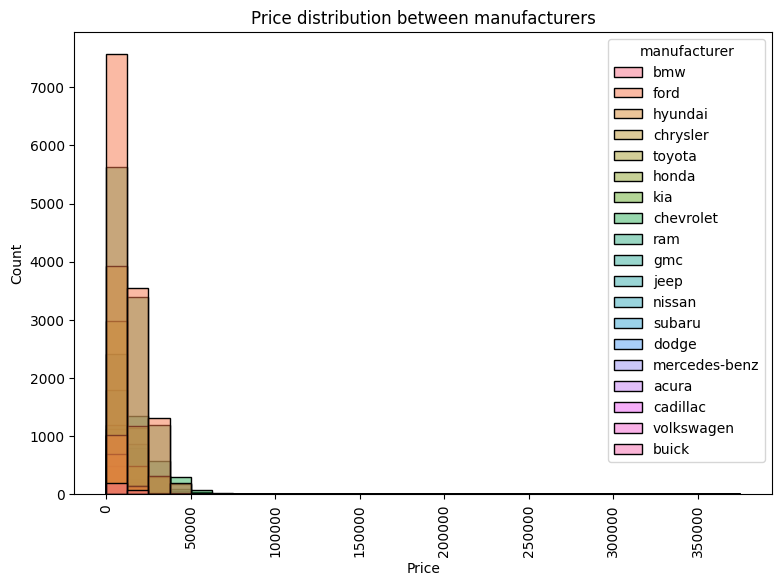

In [35]:
# Compare price distribution between manufacturers. 
plt.figure(figsize=(9, 6))
sns.histplot(data=vehicles_us, x='price', hue='manufacturer', bins=30)
plt.title('Price distribution between manufacturers')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [33]:
vehicles_us['model_year'] = pd.to_numeric(vehicles_us['model_year'], errors='coerce')

display(vehicles_us[['condition','model_year']].head())

,condition,model_year
0,good,2011.0
1,good,NaN
2,like new,2013.0
3,fair,2003.0
4,excellent,2017.0


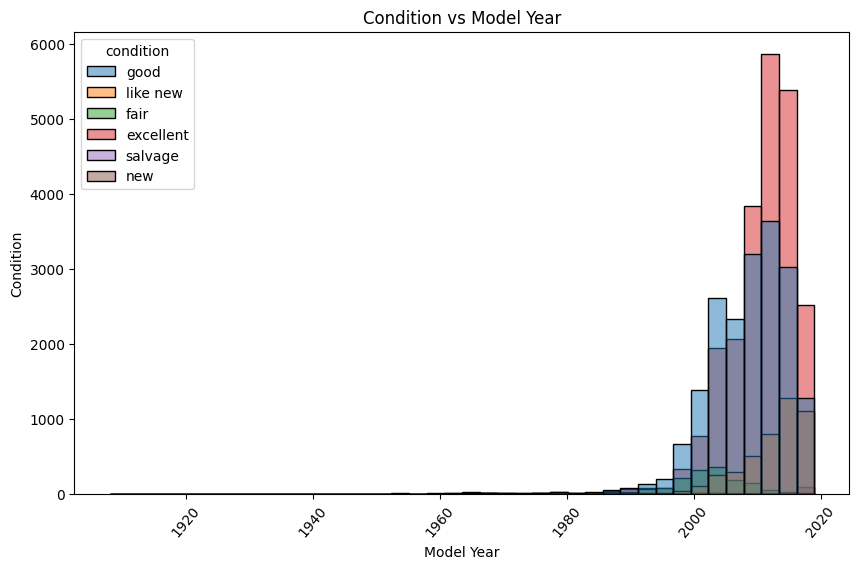

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vehicles_us, x='model_year', hue='condition', bins=40)
plt.title('Condition vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Condition')
plt.xticks(rotation=50)
plt.show()

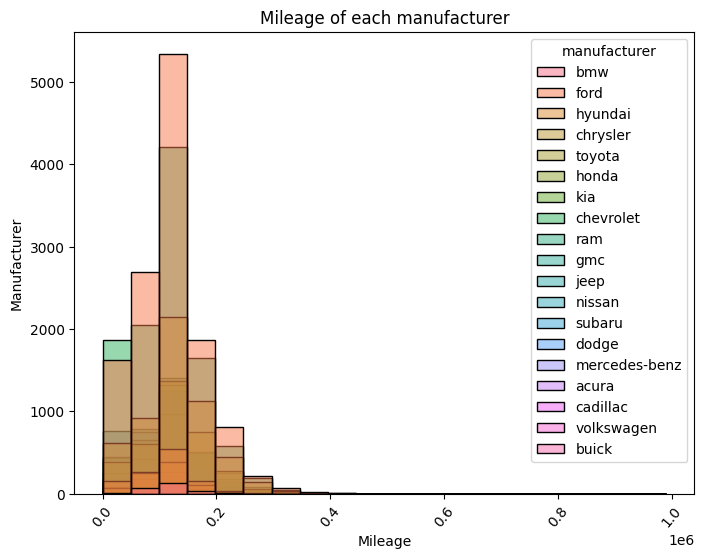

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=vehicles_us, x='odometer', hue='manufacturer', bins=20)
plt.title('Mileage of each manufacturer')
plt.xlabel('Mileage')
plt.ylabel('Manufacturer')
plt.xticks(rotation=50)
plt.show()


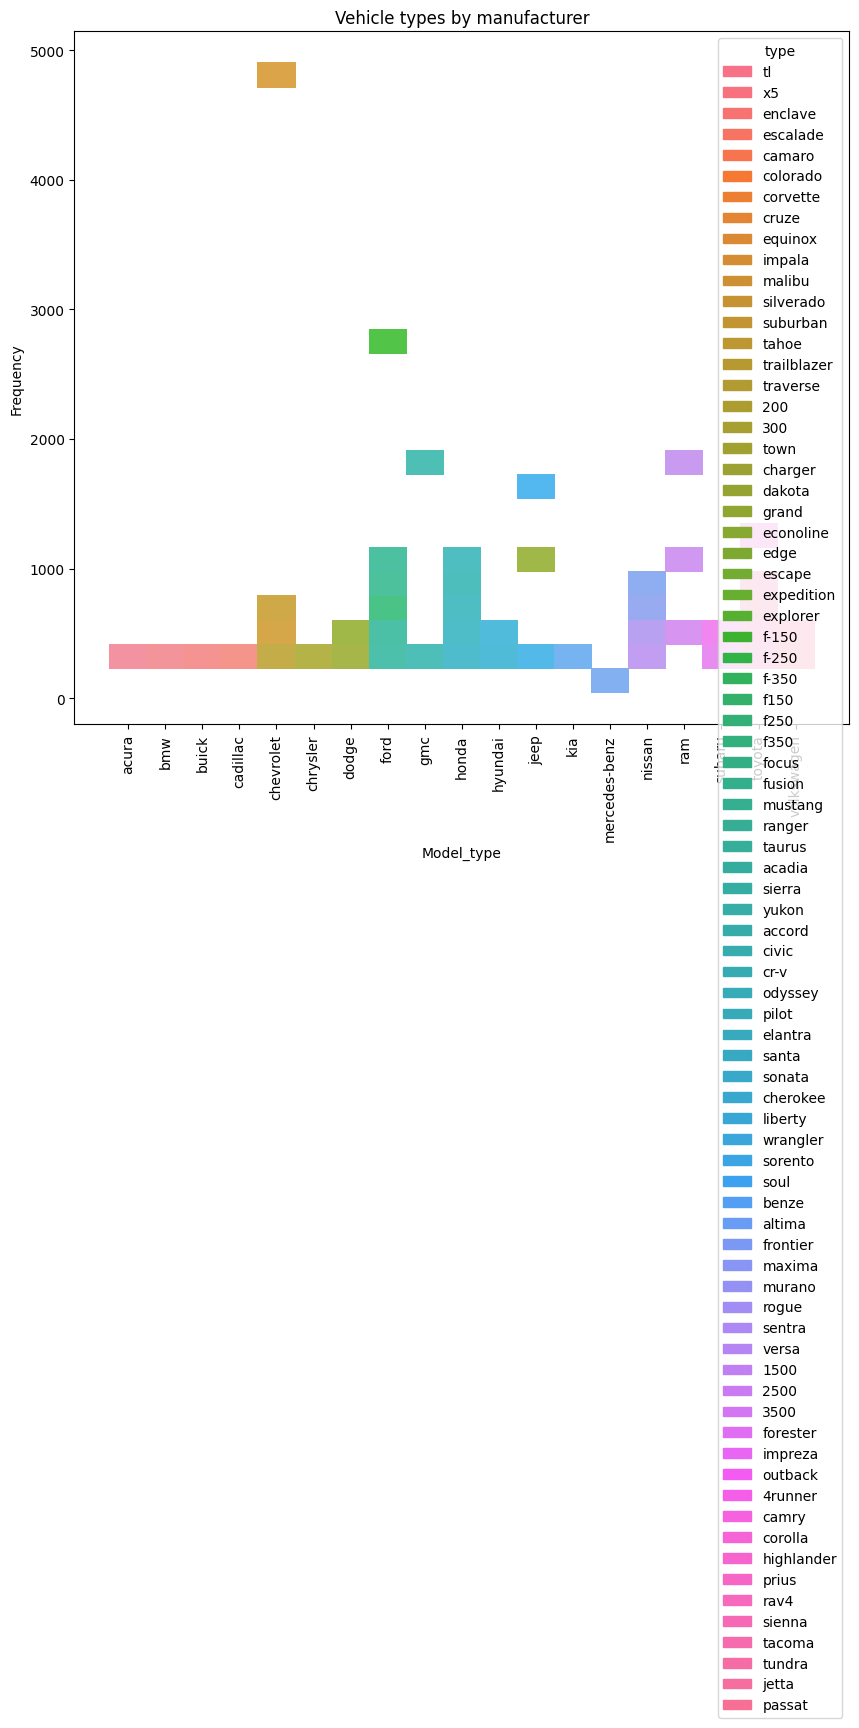

In [32]:
# Compare the vehicles types by manufacturer. Plot a histogram to visualize it. 
plt.figure(figsize=(10, 9))
sns.histplot(data=manufacturer_type_counts, x='manufacturer', y='count',hue='type')
plt.title('Vehicle types by manufacturer')
plt.xlabel('Model_type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

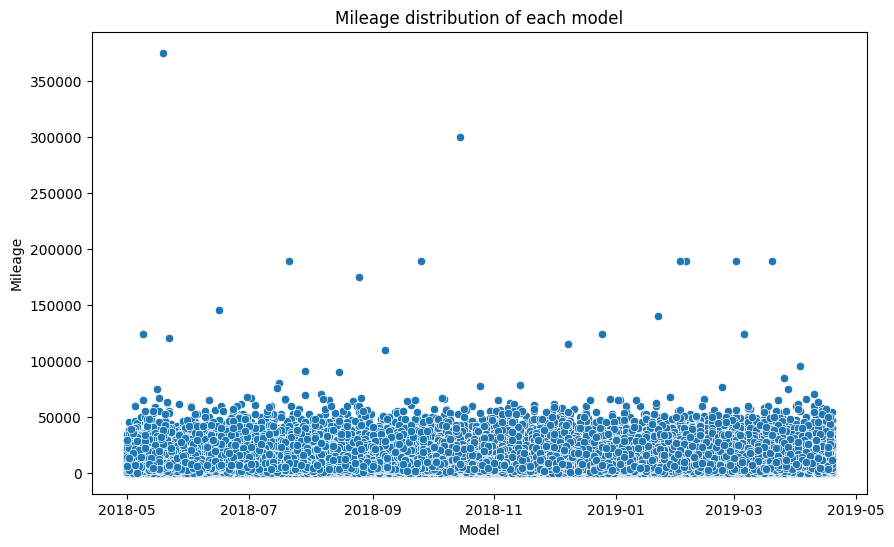

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='date_posted', y='price')
plt.title('Price based on the day the car is listed')
plt.xlabel('Date Posted')
plt.ylabel('Price')
plt.show()

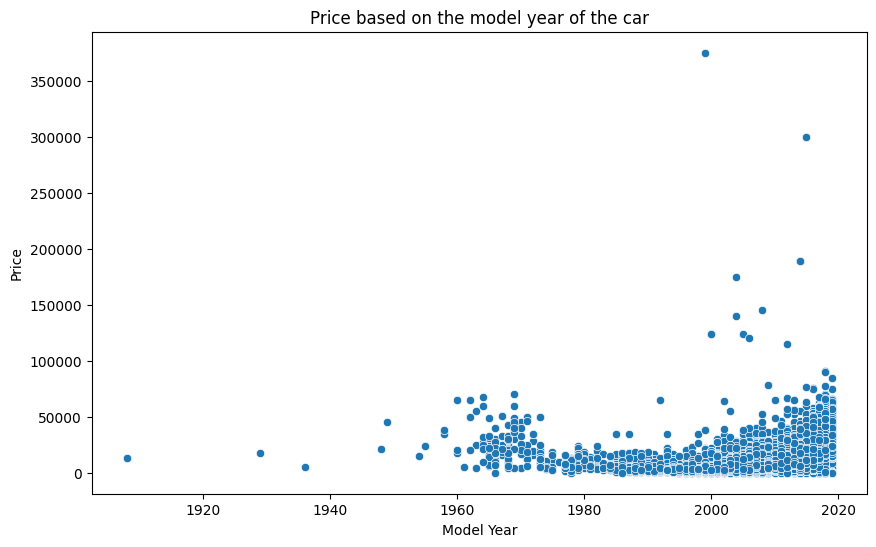

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='model_year', y='price')
plt.title('Price based on the model year of the car')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

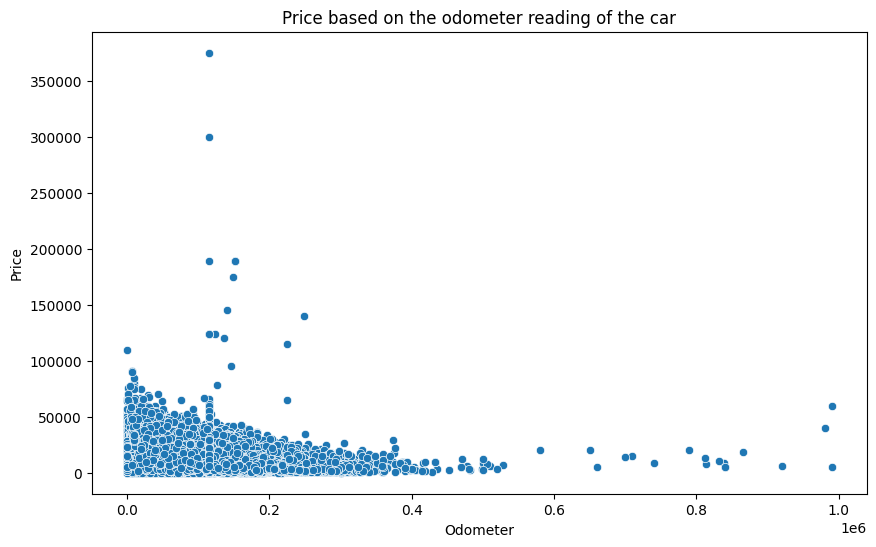

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='odometer', y='price')
plt.title('Price based on the odometer reading of the car')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

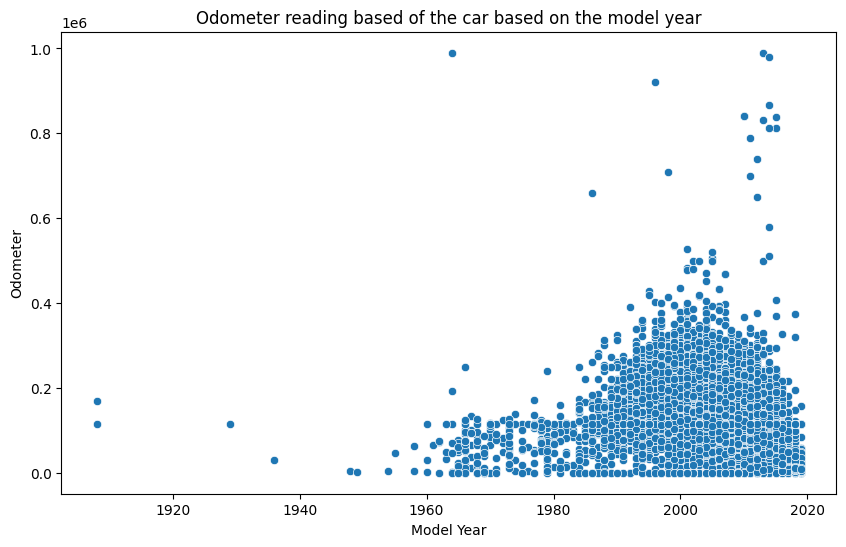

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_us, x='model_year', y='odometer')
plt.title('Odometer reading based of the car based on the model year')
plt.xlabel('Model Year')
plt.ylabel('Odometer')
plt.show()